#  EMF RBM Omniglot

### Binarized, 200 Epochs

Look at different ways of computing the

- energy density
- free energy density
- entropy density

We can

- use the TAP S and MF Energy *U_naive   
    - which takes an equlibration step first  
    - S(mv, mh), U_naive(mv, mh)
- use a simple h = means_hiddens() step
    - S(v, h), E_MF(v, h)


In [1]:
import numpy as np
import h5py

import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn import linear_model, datasets, metrics, preprocessing 
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

import psutil

/Users/charlesmartin14/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Users/charlesmartin14/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
from sklearn.datasets import fetch_mldata
from sklearn.utils.validation import assert_all_finite
from scipy.sparse import csc_matrix, csr_matrix, lil_matrix
from sklearn.preprocessing import Binarizer
np.seterr(all='warn')

{'divide': 'warn', 'invalid': 'warn', 'over': 'warn', 'under': 'ignore'}

In [3]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
import matplotlib as mpl

def show_image(image): 
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    imgplot = ax.imshow(image, cmap=mpl.cm.Greys)
    imgplot.set_interpolation('nearest')
    ax.xaxis.set_ticks_position('top')
    ax.yaxis.set_ticks_position('left')
    plt.show()

In [4]:
import rbm_datasets

In [6]:
train_x, train_y, train_char, test_x, test_y, test_char = rbm_datasets.load_omniglot_iwae()

In [7]:
from sklearn.preprocessing import binarize
X_train = binarize(train_x, threshold=0.5, copy=True)

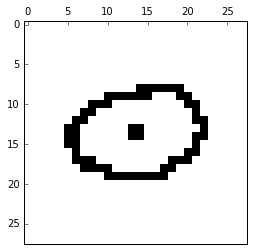

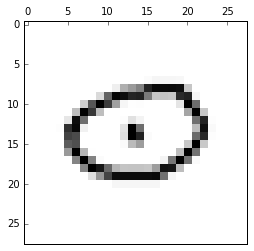

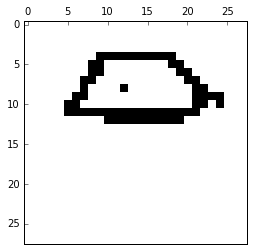

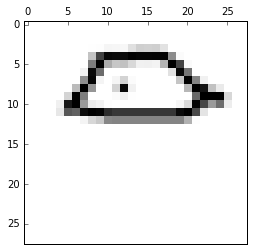

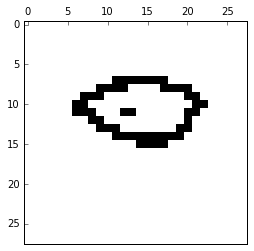

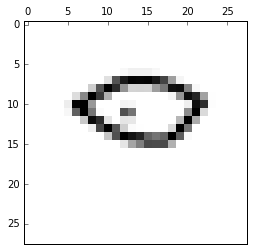

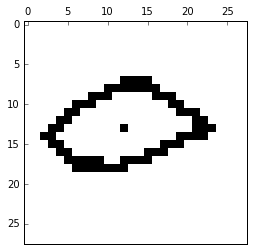

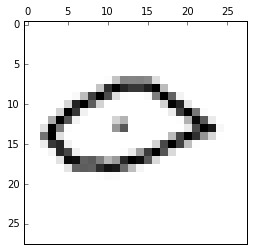

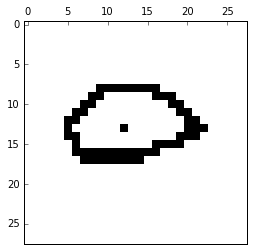

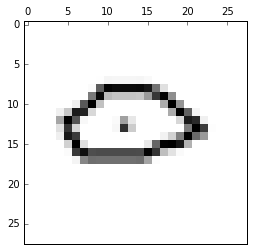

In [8]:
for i in range(5):
    show_image(X_train[i+100].reshape(28,28))
    show_image(train_x[i+100].reshape(28,28))

In [11]:
X_train.shape

(24345, 784)

### EMF RBM

In [15]:
psutil.swap_memory()

sswap(total=7516192768L, used=6550454272L, free=965738496L, percent=87.2, sin=59727265792L, sout=415178752L)

### mean Entropy, Energy, and Free Energy

In [16]:
import emf_rbm
rbm = emf_rbm.EMF_RBM(verbose=True, monitor=True, n_iter=200)
print rbm
rbm= rbm.fit(X_train)

EMF_RBM(batch_size=100, decay=0.01, learning_rate=0.005, momentum=0.5,
    monitor=True, n_components=256, n_iter=200, neq_steps=3,
    random_state=<mtrand.RandomState object at 0x106f013c0>, sigma=0.001,
    thresh=1e-08, verbose=True, weight_decay='L1')
[EMF_RBM] Iteration 1, pseudo-likelihood = -173.07, time = 6.62s
computing TAP Free Energies
monitor:  -243.661261013 346.506989736 102.848531481
[EMF_RBM] Iteration 2, pseudo-likelihood = -174.73, time = 17.93s
computing TAP Free Energies
monitor:  -243.467702702 346.482319329 103.017315966
[EMF_RBM] Iteration 3, pseudo-likelihood = -173.46, time = 17.53s
computing TAP Free Energies
monitor:  -243.278085103 346.47796933 103.202884751
[EMF_RBM] Iteration 4, pseudo-likelihood = -175.57, time = 17.72s
computing TAP Free Energies
monitor:  -243.079864909 346.46698537 103.391520222
[EMF_RBM] Iteration 5, pseudo-likelihood = -173.07, time = 16.91s
computing TAP Free Energies
monitor:  -242.839967677 346.411359636 103.581054936
[EMF_RBM] I

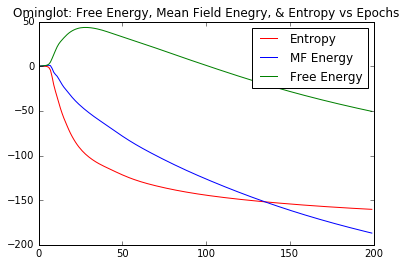

In [22]:
plt.plot(rbm.entropies-rbm.entropies[0], color='red', label='Entropy')
plt.plot(rbm.mean_field_energies-rbm.mean_field_energies[0], color='blue', label='MF Energy')
plt.plot(rbm.free_energies-rbm.free_energies[0], color='green', label='Free Energy')
plt.legend(loc='upper right')
plt.title("Ominglot: Free Energy, Mean Field Enegry, & Entropy vs Epochs")


In [23]:
from sklearn.preprocessing import binarize
X_test = binarize(test_x, threshold=0.5, copy=True)

In [24]:
np.unique(train_y)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

F_train = rbm.transform(X_train)
F_test = rbm.transform(X_test)

for c in [0.01, 0.1, 1, 10, 100]:
    classifier = LinearSVC()
    classifier.fit(F_train, train_y)
    test_emf_rbm_pred_y = classifier.predict(F_test)
    emf_accuracy = accuracy_score(y_pred=test_emf_rbm_pred_y, y_true=test_y)
    print c, emf_accuracy